## Pandas 学习笔记

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 创建数据对象

In [204]:
# 创建Series对象
s = pd.Series(np.array([1,3,5, np.nan, 6, 8]))
s = pd.Series([1,3,5, np.nan, 6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [205]:
s.count()

5

In [206]:
# 创建 DataFrame对象
dates = pd.date_range('20130101', periods=6) # 这个一会儿做dataframe的index

In [207]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [208]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [209]:
df

,A,B,C,D
2013-01-01,-1.008169,1.281917,0.483236,-0.874613
2013-01-02,1.243472,-0.758668,0.677536,2.026131
2013-01-03,1.308964,-0.323724,-0.801770,0.610809
2013-01-04,1.589928,1.444929,-1.206686,-1.011274
2013-01-05,-0.436136,2.362390,0.325645,1.685350
2013-01-06,0.034181,-0.308047,-1.461348,0.475759


In [210]:
df2 = pd.DataFrame({'A': 1, 
                    'B': pd.Timestamp('20130102'), 
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), 
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [211]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看数据

In [212]:
df.head(2)

,A,B,C,D
2013-01-01,-1.008169,1.281917,0.483236,-0.874613
2013-01-02,1.243472,-0.758668,0.677536,2.026131


In [213]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.436136,2.362390,0.325645,1.685350
2013-01-06,0.034181,-0.308047,-1.461348,0.475759


In [214]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [215]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [216]:
df2.values

array([[1L, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1L, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1L, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1L, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)

In [217]:
df.describe() #类似R： summary(df)

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.455373,0.616466,-0.330564,0.485360
std,1.072481,1.249568,0.935676,1.258509
min,-1.008169,-0.758668,-1.461348,-1.011274
25%,-0.318557,-0.319804,-1.105457,-0.537020
50%,0.638827,0.486935,-0.238063,0.543284
75%,1.292591,1.404176,0.443838,1.416715
max,1.589928,2.362390,0.677536,2.026131


In [218]:
df.T # Transpose


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.008169,1.243472,1.308964,1.589928,-0.436136,0.034181
B,1.281917,-0.758668,-0.323724,1.444929,2.362390,-0.308047
C,0.483236,0.677536,-0.801770,-1.206686,0.325645,-1.461348
D,-0.874613,2.026131,0.610809,-1.011274,1.685350,0.475759


In [219]:
df.T.index

Index([u'A', u'B', u'C', u'D'], dtype='object')

### 排序
可以按列index排序，交换各列的顺序，也可以按指定列的值排序

In [220]:
df.sort_index(axis=1, ascending=False) # 按index排序, 调换了index的顺序

,D,C,B,A
2013-01-01,-0.874613,0.483236,1.281917,-1.008169
2013-01-02,2.026131,0.677536,-0.758668,1.243472
2013-01-03,0.610809,-0.801770,-0.323724,1.308964
2013-01-04,-1.011274,-1.206686,1.444929,1.589928
2013-01-05,1.685350,0.325645,2.362390,-0.436136
2013-01-06,0.475759,-1.461348,-0.308047,0.034181


In [221]:
df.sort_values(by='A') #按指定列排序

,A,B,C,D
2013-01-01,-1.008169,1.281917,0.483236,-0.874613
2013-01-05,-0.436136,2.362390,0.325645,1.685350
2013-01-06,0.034181,-0.308047,-1.461348,0.475759
2013-01-02,1.243472,-0.758668,0.677536,2.026131
2013-01-03,1.308964,-0.323724,-0.801770,0.610809
2013-01-04,1.589928,1.444929,-1.206686,-1.011274


### 数据选择

In [222]:
df[['A', 'B']] # 所有行的某两列， 某一列 : df['A']

,A,B
2013-01-01,-1.008169,1.281917
2013-01-02,1.243472,-0.758668
2013-01-03,1.308964,-0.323724
2013-01-04,1.589928,1.444929
2013-01-05,-0.436136,2.362390
2013-01-06,0.034181,-0.308047


In [223]:
df[0:2] 

,A,B,C,D
2013-01-01,-1.008169,1.281917,0.483236,-0.874613
2013-01-02,1.243472,-0.758668,0.677536,2.026131


**注意**： 即时是取一个值也需要前后bound, 并且返回的总是DataFrame对象。像这样 `df[0]` 是不行的。

In [224]:
df[1:2]

,A,B,C,D
2013-01-02,1.243472,-0.758668,0.677536,2.026131


In [225]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.243472,-0.758668,0.677536,2.026131
2013-01-03,1.308964,-0.323724,-0.801770,0.610809
2013-01-04,1.589928,1.444929,-1.206686,-1.011274


**疑问**：如何选取几个不连续的行？比如选出`20130102`和`20130104`的？答案： 使用`iloc()`函数

In [226]:
df.iloc[[1,3]] 

,A,B,C,D
2013-01-02,1.243472,-0.758668,0.677536,2.026131
2013-01-04,1.589928,1.444929,-1.206686,-1.011274


#### 按label选取

In [227]:
df.loc[pd.Timestamp('20130102')]

A    1.243472
B   -0.758668
C    0.677536
D    2.026131
Name: 2013-01-02 00:00:00, dtype: float64

或者

In [228]:
df.loc['20130102'] #不知道为啥这个label输入可以简化成这种

A    1.243472
B   -0.758668
C    0.677536
D    2.026131
Name: 2013-01-02 00:00:00, dtype: float64

只选出指定列

In [229]:
df.loc['20130102',['A', 'B']]

A    1.243472
B   -0.758668
Name: 2013-01-02 00:00:00, dtype: float64

所有行用 `:`表示

In [230]:
df.loc[:, ['B', 'C']]

,B,C
2013-01-01,1.281917,0.483236
2013-01-02,-0.758668,0.677536
2013-01-03,-0.323724,-0.801770
2013-01-04,1.444929,-1.206686
2013-01-05,2.362390,0.325645
2013-01-06,-0.308047,-1.461348


按label选取时也可以按范围选取, **endpoint is included**

In [231]:
df.loc['20130102':'20130104', ['A', 'D']]

,A,D
2013-01-02,1.243472,2.026131
2013-01-03,1.308964,0.610809
2013-01-04,1.589928,-1.011274


#### 按行号/列号选择 `.iloc[]`
Endpoints is not included

In [232]:
df.iloc[3,[1,2]]

B    1.444929
C   -1.206686
Name: 2013-01-04 00:00:00, dtype: float64

In [233]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.589928,1.444929
2013-01-05,-0.436136,2.362390


取某行某列的值

In [234]:
df.iloc[1,2]

0.67753635676821344

或者更快的

In [235]:
df.iat[1,2]

0.67753635676821344

### 逻辑Indexing

bool运算符、`isin()`函数

In [236]:
df[df.A>0]

,A,B,C,D
2013-01-02,1.243472,-0.758668,0.677536,2.026131
2013-01-03,1.308964,-0.323724,-0.801770,0.610809
2013-01-04,1.589928,1.444929,-1.206686,-1.011274
2013-01-06,0.034181,-0.308047,-1.461348,0.475759


In [237]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,1.281917,0.483236,NaN
2013-01-02,1.243472,NaN,0.677536,2.026131
2013-01-03,1.308964,NaN,NaN,0.610809
2013-01-04,1.589928,1.444929,NaN,NaN
2013-01-05,NaN,2.362390,0.325645,1.685350
2013-01-06,0.034181,NaN,NaN,0.475759


In [238]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.008169,1.281917,0.483236,-0.874613,one
2013-01-02,1.243472,-0.758668,0.677536,2.026131,one
2013-01-03,1.308964,-0.323724,-0.801770,0.610809,two
2013-01-04,1.589928,1.444929,-1.206686,-1.011274,three
2013-01-05,-0.436136,2.362390,0.325645,1.685350,four
2013-01-06,0.034181,-0.308047,-1.461348,0.475759,three


In [239]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.308964,-0.323724,-0.801770,0.610809,two
2013-01-05,-0.436136,2.362390,0.325645,1.685350,four


### 设置值seting

设置一整列，按label

In [240]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [241]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [242]:
df['F'] = s1 # 自动增加了一列，就像字典一样

In [243]:
df

,A,B,C,D,F
2013-01-01,-1.008169,1.281917,0.483236,-0.874613,NaN
2013-01-02,1.243472,-0.758668,0.677536,2.026131,1.0
2013-01-03,1.308964,-0.323724,-0.801770,0.610809,2.0
2013-01-04,1.589928,1.444929,-1.206686,-1.011274,3.0
2013-01-05,-0.436136,2.362390,0.325645,1.685350,4.0
2013-01-06,0.034181,-0.308047,-1.461348,0.475759,5.0


给定label设置某一个值：

In [244]:
df.at[dates[0], 'A']=0

In [245]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.281917,0.483236,-0.874613,NaN
2013-01-02,1.243472,-0.758668,0.677536,2.026131,1.0
2013-01-03,1.308964,-0.323724,-0.801770,0.610809,2.0
2013-01-04,1.589928,1.444929,-1.206686,-1.011274,3.0
2013-01-05,-0.436136,2.362390,0.325645,1.685350,4.0
2013-01-06,0.034181,-0.308047,-1.461348,0.475759,5.0


给定位置设置某一个值：

In [246]:
df.iat[0,1] = 1

直接用np.array赋值

In [247]:
df.loc[:,'D'] = np.array([5]*len(df))

In [248]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.000000,0.483236,5,NaN
2013-01-02,1.243472,-0.758668,0.677536,5,1.0
2013-01-03,1.308964,-0.323724,-0.801770,5,2.0
2013-01-04,1.589928,1.444929,-1.206686,5,3.0
2013-01-05,-0.436136,2.362390,0.325645,5,4.0
2013-01-06,0.034181,-0.308047,-1.461348,5,5.0


条件设置

In [249]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-1.000000,-0.483236,-5,NaN
2013-01-02,-1.243472,-0.758668,-0.677536,-5,-1.0
2013-01-03,-1.308964,-0.323724,-0.801770,-5,-2.0
2013-01-04,-1.589928,-1.444929,-1.206686,-5,-3.0
2013-01-05,-0.436136,-2.362390,-0.325645,-5,-4.0
2013-01-06,-0.034181,-0.308047,-1.461348,-5,-5.0


### 缺省值

In [250]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])

In [251]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.483236,5,NaN,NaN
2013-01-02,1.243472,-0.758668,0.677536,5,1.0,NaN
2013-01-03,1.308964,-0.323724,-0.801770,5,2.0,NaN
2013-01-04,1.589928,1.444929,-1.206686,5,3.0,NaN


In [252]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.483236,5,NaN,1.0
2013-01-02,1.243472,-0.758668,0.677536,5,1.0,1.0
2013-01-03,1.308964,-0.323724,-0.801770,5,2.0,NaN
2013-01-04,1.589928,1.444929,-1.206686,5,3.0,NaN


扔掉有NaN的行

In [253]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.243472,-0.758668,0.677536,5,1.0,1.0


替换掉NaN

In [254]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.483236,5,5.0,1.0
2013-01-02,1.243472,-0.758668,0.677536,5,1.0,1.0
2013-01-03,1.308964,-0.323724,-0.801770,5,2.0,5.0
2013-01-04,1.589928,1.444929,-1.206686,5,3.0,5.0


检测哪里是NaN

In [255]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 数据操作

#### 统计信息

* `mean` : 均值
* `var`  : 方差
* `std`  : 标准差

**注意**: 一般的数据操作默认会忽略NaN数据。

In [256]:
df.mean()

A    0.623402
B    0.569480
C   -0.330564
D    5.000000
F    3.000000
dtype: float64

In [257]:
df.mean(axis=1) # 每一行各元素的平均， or simply df.mean(1)

2013-01-01    1.620809
2013-01-02    1.432468
2013-01-03    1.436694
2013-01-04    1.965634
2013-01-05    2.250380
2013-01-06    1.652957
Freq: D, dtype: float64

In [258]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [259]:
df.sub(s, axis='index') #相减，注意跟NaN相互运算结果也是NaN

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.308964,-1.323724,-1.801770,4.0,1.0
2013-01-04,-1.410072,-1.555071,-4.206686,2.0,0.0
2013-01-05,-5.436136,-2.637610,-4.674355,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### `apply` 作用函数

In [265]:
df.apply(np.cumsum) # 累加操作

,A,B,C,D,F
2013-01-01,0.000000,1.000000,0.483236,5,NaN
2013-01-02,1.243472,0.241332,1.160773,10,1.0
2013-01-03,2.552437,-0.082392,0.359003,15,3.0
2013-01-04,4.142365,1.362538,-0.847683,20,6.0
2013-01-05,3.706229,3.724927,-0.522038,25,10.0
2013-01-06,3.740410,3.416880,-1.983386,30,15.0


In [266]:
df.apply(np.min)

A   -0.436136
B   -0.758668
C   -1.461348
D    5.000000
F    1.000000
dtype: float64

In [267]:
df.apply(lambda x: x.max() - x.min())

A    2.026065
B    3.121058
C    2.138885
D    0.000000
F    4.000000
dtype: float64

#### 频率统计Histogramming

In [270]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [274]:
s.value_counts()

5    3
6    2
1    2
3    1
2    1
0    1
dtype: int64

#### String 操作

In [275]:
s = pd.Series(["Cat", "Dog", "BIRD", np.nan, "human"])

In [287]:
s.str.upper()

0      CAT
1      DOG
2     BIRD
3      NaN
4    HUMAN
dtype: object

### 数据合并
#### Concat

In [290]:
df = pd.DataFrame(np.random.randn(10,4))

In [291]:
df

,0,1,2,3
0,1.797605,0.462519,-0.227326,-0.892958
1,-0.575293,-0.775562,1.631454,0.139375
2,0.447647,1.095106,-1.013658,1.190098
3,0.294311,0.789834,0.921658,0.503146
4,-0.103590,0.717948,0.601901,0.377076
5,0.451330,0.515278,-1.478235,0.332239
6,0.431226,1.897785,0.824040,-0.551545
7,2.049533,1.433007,-1.046997,-0.432713
8,0.289855,0.730057,-0.071090,-1.408817
9,0.909264,0.849716,0.287103,-0.240455


In [292]:
pieces = [df[:3], df[3:7], df[7:]]

In [295]:
pieces[0]

,0,1,2,3
0,1.797605,0.462519,-0.227326,-0.892958
1,-0.575293,-0.775562,1.631454,0.139375
2,0.447647,1.095106,-1.013658,1.190098


In [296]:
pieces[1]

,0,1,2,3
3,0.294311,0.789834,0.921658,0.503146
4,-0.103590,0.717948,0.601901,0.377076
5,0.451330,0.515278,-1.478235,0.332239
6,0.431226,1.897785,0.824040,-0.551545


In [297]:
pd.concat(pieces) #拼接回去，按行拼接，跟linux的cat命令一样

,0,1,2,3
0,1.797605,0.462519,-0.227326,-0.892958
1,-0.575293,-0.775562,1.631454,0.139375
2,0.447647,1.095106,-1.013658,1.190098
3,0.294311,0.789834,0.921658,0.503146
4,-0.103590,0.717948,0.601901,0.377076
5,0.451330,0.515278,-1.478235,0.332239
6,0.431226,1.897785,0.824040,-0.551545
7,2.049533,1.433007,-1.046997,-0.432713
8,0.289855,0.730057,-0.071090,-1.408817
9,0.909264,0.849716,0.287103,-0.240455


#### Join

In [309]:
left = pd.DataFrame({"name":["ZHU","WANG"], "high":["Yes", "No"]}) 
right =  pd.DataFrame({"name":["WANG","ZHU"], "age":[27, 25]})

In [306]:
left #可以发现，columns的顺序并不是这个df创建时的顺序

,high,name
0,Yes,ZHU
1,No,WANG


In [307]:
right

,age,name
0,25,WANG
1,27,ZHU


In [311]:
pd.merge(left, right, on='name') #按name合并。

,high,name,age
0,Yes,ZHU,25
1,No,WANG,27


In [322]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [323]:
left

,key,lval
0,foo,1
1,foo,2


In [324]:
right

,key,rval
0,foo,4
1,foo,5


In [325]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Append

In [327]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]

In [328]:
df

,A,B,C,D
0,-0.396817,0.048729,-0.797407,-1.551445
1,-1.423160,-0.363141,0.439660,0.492666
2,1.541007,-2.773925,-0.605419,-0.974521
3,-0.871626,-1.250495,0.262023,1.569433
4,0.148551,0.578095,-0.590626,-0.661537
5,0.429475,-0.783494,-0.347244,-1.630672
6,0.270739,-1.585078,1.523987,-0.929354
7,0.599929,0.299780,0.426817,-0.368345


In [331]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.396817,0.048729,-0.797407,-1.551445
1,-1.423160,-0.363141,0.439660,0.492666
2,1.541007,-2.773925,-0.605419,-0.974521
3,-0.871626,-1.250495,0.262023,1.569433
4,0.148551,0.578095,-0.590626,-0.661537
5,0.429475,-0.783494,-0.347244,-1.630672
6,0.270739,-1.585078,1.523987,-0.929354
7,0.599929,0.299780,0.426817,-0.368345
8,-0.871626,-1.250495,0.262023,1.569433


### Group
Group通指下面这些操作
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [335]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [336]:
df

,A,B,C,D
0,foo,one,-2.745916,-0.306248
1,bar,one,0.518784,-0.036356
2,foo,two,-1.709455,-0.596219
3,bar,three,-2.092492,0.180544
4,foo,two,0.523511,1.422067
5,bar,two,-1.448449,-1.472307
6,foo,one,-1.610037,0.506798
7,foo,three,-2.844026,-0.318876


In [343]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.022157,-1.328119
foo,-8.385923,0.707522


#### 多级Group

In [345]:

df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.518784 -0.036356
    three -2.092492  0.180544
    two   -1.448449 -1.472307
foo one   -4.355953  0.200550
    three -2.844026 -0.318876
    two   -1.185944  0.825848

### Reshapping
#### Stack

In [346]:
In [95]: tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 

In [347]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [349]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second']) #创建multiIndex, names是两级index的名字

In [350]:
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [351]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [352]:
df

A         B
first second                    
bar   one    -0.126302  0.670208
      two     0.177027  1.209745
baz   one    -0.122863 -0.316292
      two     0.699538  0.692639
foo   one    -0.443146 -0.127540
      two     0.866551 -0.219917
qux   one     1.280984 -0.186197
      two     0.390714  0.716071

In [353]:
df2 = df[:4] #按flatted的索引编号

In [354]:
df2

A         B
first second                    
bar   one    -0.126302  0.670208
      two     0.177027  1.209745
baz   one    -0.122863 -0.316292
      two     0.699538  0.692639

In [355]:
stacked = df2.stack()

In [358]:
stacked

first  second   
bar    one     A   -0.126302
               B    0.670208
       two     A    0.177027
               B    1.209745
baz    one     A   -0.122863
               B   -0.316292
       two     A    0.699538
               B    0.692639
dtype: float64

### 时间序列

In [371]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [372]:
ts

2012-01-01 00:00:00    287
2012-01-01 00:00:01    437
2012-01-01 00:00:02    429
2012-01-01 00:00:03     88
2012-01-01 00:00:04    347
2012-01-01 00:00:05    220
2012-01-01 00:00:06    447
2012-01-01 00:00:07    337
2012-01-01 00:00:08    283
2012-01-01 00:00:09     35
2012-01-01 00:00:10    303
2012-01-01 00:00:11    112
2012-01-01 00:00:12    282
2012-01-01 00:00:13    200
2012-01-01 00:00:14    136
2012-01-01 00:00:15    172
2012-01-01 00:00:16     74
2012-01-01 00:00:17    163
2012-01-01 00:00:18    378
2012-01-01 00:00:19    444
2012-01-01 00:00:20    434
2012-01-01 00:00:21    169
2012-01-01 00:00:22    402
2012-01-01 00:00:23      8
2012-01-01 00:00:24    485
2012-01-01 00:00:25     39
2012-01-01 00:00:26    175
2012-01-01 00:00:27    214
2012-01-01 00:00:28    103
2012-01-01 00:00:29    355
                      ... 
2012-01-01 00:01:10     66
2012-01-01 00:01:11     36
2012-01-01 00:01:12    163
2012-01-01 00:01:13    195
2012-01-01 00:01:14    239
2012-01-01 00:01:15    179
2

In [388]:
ts.resample('10s').min() #每10s一个区间采样，取最各区间最低值
# 还可以是 1d, 1Min, 5Min, 1M(月), 

2012-01-01 00:00:00    35
2012-01-01 00:00:10    74
2012-01-01 00:00:20     8
2012-01-01 00:00:30    17
2012-01-01 00:00:40    10
2012-01-01 00:00:50    57
2012-01-01 00:01:00    31
2012-01-01 00:01:10    36
2012-01-01 00:01:20    61
2012-01-01 00:01:30    63
Freq: 10S, dtype: int32

转换时间间隔

In [410]:
rng = pd.date_range('20120131', periods=5, freq='M')

In [411]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [412]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [413]:
ts

2012-01-31   -0.032956
2012-02-29   -0.890623
2012-03-31    0.432198
2012-04-30   -1.016159
2012-05-31   -0.438173
Freq: M, dtype: float64

In [414]:
ps = ts.to_period()
ps

2012-01   -0.032956
2012-02   -0.890623
2012-03    0.432198
2012-04   -1.016159
2012-05   -0.438173
Freq: M, dtype: float64

In [415]:
ps.to_timestamp()

2012-01-01   -0.032956
2012-02-01   -0.890623
2012-03-01    0.432198
2012-04-01   -1.016159
2012-05-01   -0.438173
Freq: MS, dtype: float64

### 类别

In [425]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [430]:
df['raw_grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [427]:
df['grade'] = df['raw_grade'].astype("category")

In [428]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [429]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [431]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [432]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


### 绘图

In [465]:
#set jupytor notebook evn
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2017', periods=1000))

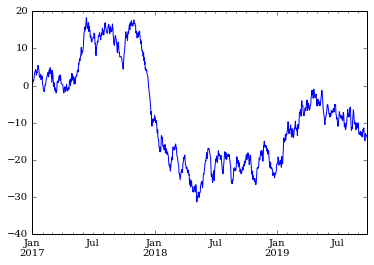

In [466]:
ts = ts.cumsum()
ts.plot() #随机游走

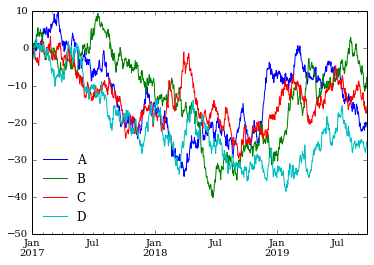

In [470]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [471]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')